#Disease Prediction from Symptoms

The dataset source: http://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html

The extraction was performed by copying the data on the website in the .html format and saving it in an Excel file for performing further operations. Basic cleaning, segmentation of columns and string formatting were performed in excel. The excel sheet was then added to this Google Colab Notebook.



##Importing all needed libraries

In [1]:
# Import Dependencies
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Transforming & Loading the Data

### Loading the Dataset File generated after preprocessing in excel

In [2]:
disease_list = []

def return_list(disease):
    disease_list = []
    match = disease.replace('^','_').split('_') # using _ as common splitting delimeter
    ctr = 1
    for group in match:
        if ctr%2==0:
            disease_list.append(group) # refer the data format
        ctr = ctr + 1

    return disease_list

with open("C:\\Users\\HARSHAVA-B024DC\\Desktop\\5th sem\\bigdata\\Disease-Prediction-from-Symptoms\\Datasets\\raw_data_2.csv") as csvfile:
    reader = csv.reader(csvfile)
    disease=""
    weight = 0
    disease_list = []
    dict_wt = {}
    dict_=defaultdict(list)
    
    for row in reader:

        if row[0]!="\xc2\0xa0" and row[0]!="": # for handling file encoding errors
          # saving disease and frequency
            disease = row[0]
            disease_list = return_list(disease)
            weight = row[1]

        if row[2]!="\xc2\0xa0" and row[2]!="":
            symptom_list = return_list(row[2])

            for d in disease_list:
                for s in symptom_list:
                    dict_[d].append(s) # adding all symptoms
                dict_wt[d] = weight


### Reformatting the data

In [3]:
# saving cleaned data
with open("dataset_clean.csv","w") as csvfile:
    writer = csv.writer(csvfile)
    for key,values in dict_.items():
        for v in values:
            #key = str.encode(key)
            key = str.encode(key).decode('utf-8')
            #.strip()
            #v = v.encode('utf-8').strip()
            #v = str.encode(v)
            writer.writerow([key,v,dict_wt[key]])

In [4]:
columns = ['Source','Target','Weight'] # source: disease, target: symptom, weight: number of cases

In [5]:
data = pd.read_csv("dataset_clean.csv",names=columns, encoding ="ISO-8859-1")

In [6]:
data.head()

,Source,Target,Weight
0,hypertensive disease,pain chest,3363
1,hypertensive disease,shortness of breath,3363
2,hypertensive disease,dizziness,3363
3,hypertensive disease,asthenia,3363
4,hypertensive disease,fall,3363


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  2129 non-null   object
 1   Target  2126 non-null   object
 2   Weight  2129 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 50.0+ KB


In [8]:
data.to_csv("dataset_clean.csv",index=False)

In [9]:
data = pd.read_csv("dataset_clean.csv", encoding ="ISO-8859-1")

In [10]:
data.head()

,Source,Target,Weight
0,hypertensive disease,pain chest,3363
1,hypertensive disease,shortness of breath,3363
2,hypertensive disease,dizziness,3363
3,hypertensive disease,asthenia,3363
4,hypertensive disease,fall,3363


In [11]:
len(data['Source'].unique()) # unique diseases

149

In [12]:
len(data['Target'].unique()) # unique symptoms

405

In [13]:
df = pd.DataFrame(data)

In [14]:
df_1 = pd.get_dummies(df.Target) # 1 hot encoding symptoms

In [15]:
df_1.head()

,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,abscess bacterial,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.head()

,Source,Target,Weight
0,hypertensive disease,pain chest,3363
1,hypertensive disease,shortness of breath,3363
2,hypertensive disease,dizziness,3363
3,hypertensive disease,asthenia,3363
4,hypertensive disease,fall,3363


In [17]:
df_s = df['Source']

In [18]:
df_pivoted = pd.concat([df_s,df_1], axis=1)

In [19]:
df_pivoted.drop_duplicates(keep='first',inplace=True)

In [20]:
df_pivoted[:5]

,Source,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
len(df_pivoted)

2116

In [22]:
cols = df_pivoted.columns

In [23]:
cols = cols[1:] # removing headings

In [24]:
# visualizing existance of symptoms for diseases
df_pivoted = df_pivoted.groupby('Source').sum()
df_pivoted = df_pivoted.reset_index()
df_pivoted[:5]

,Source,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,HIV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PneumocystisÃÂ cariniiÃÂ pneumonia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,accidentÃÂ cerebrovascular,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,acquiredÃÂ immuno-deficiency syndrome,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
len(df_pivoted)

149

In [26]:
df_pivoted.to_csv("df_pivoted.csv")

In [27]:
# defining data for training
x = df_pivoted[cols]
y = df_pivoted['Source']

##Building Model

In [28]:
# importing all needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [29]:
# performing train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [30]:
# Training multinomial naive bayes
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [31]:
mnb.score(x_test, y_test)

0.0

###Inferences on train and test split
It can't work on unseen data because it has never seen that disease before. Also, there is only one point for each disease and hence no point for this. So we need to train the model entirely. Then what will we test it on? Missing data? Say given one symptom what is the disease? This is again multilabel classification. We can work symptom on symptom. What exactly is differential diagnosis, we need to replicate that.

In [32]:
mnb_tot = MultinomialNB()
mnb_tot = mnb_tot.fit(x, y)

In [33]:
mnb_tot.score(x, y)

0.8993288590604027

In [34]:
disease_pred = mnb_tot.predict(x)

In [35]:
disease_real = y.values

In [36]:
# printing model error
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0} Actual:{1}'.format(disease_pred[i], disease_real[i]))

Pred: HIV Actual:acquiredÃÂ immuno-deficiency syndrome
Pred: biliary calculus Actual:cholelithiasis
Pred: coronary arteriosclerosis Actual:coronary heart disease
Pred: depression mental Actual:depressive disorder
Pred: HIV Actual:hiv infections
Pred: carcinoma breast Actual:malignant neoplasm of breast
Pred: carcinoma of lung Actual:malignant neoplasm of lung
Pred: carcinoma prostate Actual:malignant neoplasm of prostate
Pred: carcinoma colon Actual:malignant tumor of colon
Pred: candidiasis Actual:oralÃÂ candidiasis
Pred: effusion pericardial Actual:pericardial effusion body substance
Pred: malignant neoplasms Actual:primary malignant neoplasm
Pred: sepsis (invertebrate) Actual:septicemia
Pred: sepsis (invertebrate) Actual:systemic infection
Pred: tonic-clonic epilepsy Actual:tonic-clonic seizures


## Using decision trees

In [37]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [38]:
print ("DecisionTree")
dt = DecisionTreeClassifier()
clf_dt=dt.fit(x,y)
print ("Acurracy: ", clf_dt.score(x,y))

DecisionTree
Acurracy:  0.8993288590604027


In [39]:
from sklearn import tree 
from sklearn.tree import export_graphviz

export_graphviz(dt, 
                out_file='tree.jpg', 
                feature_names=cols
               )

In [40]:
from IPython.display import Image
Image(filename='tree.jpg')

##Manual Analysis data

In [41]:
data = pd.read_csv("C:\\Users\\HARSHAVA-B024DC\\Desktop\\5th sem\\bigdata\\Disease-Prediction-from-Symptoms\\Datasets\\Training.csv")

In [42]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [43]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [44]:
len(data.columns)

133

In [45]:
len(data['prognosis'].unique())

41

In [46]:
df = pd.DataFrame(data)

In [47]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [48]:
len(df)

4920

In [49]:
cols = df.columns

In [50]:
cols = cols[:-1]

In [51]:
len(cols)

132

In [52]:
x = df[cols]
y = df['prognosis']

In [53]:
x

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [54]:
y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

## Building Classifier: Using Multinomial Naive Bayes

In [55]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [56]:
# Create a Multinomial Naive Bayes classifier instance
clf = MultinomialNB(alpha=70)

# Fit the classifier on your training data
clf.fit(X_train, y_train)


MultinomialNB(alpha=70)

In [57]:
# Make predictions on the test data
y_pred = clf.predict(X_test)


In [58]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Optionally, print a classification report with additional metrics
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9987684729064039
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00      1.00        48
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00     

Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00      1.00        48
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        34
   

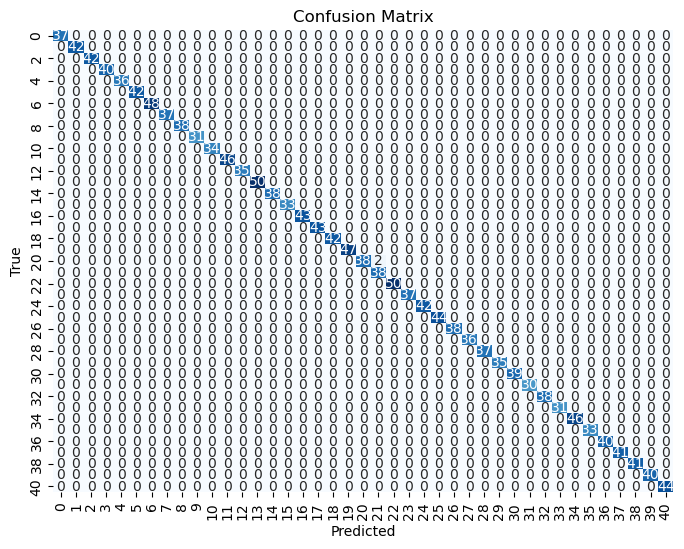

Weighted Precision: 0.9988300492610837
Weighted Recall: 0.9987684729064039
Weighted F1 Score: 0.9987684729064039


In [59]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained your classifier and made predictions on the test set
# Replace y_true and y_pred with your actual and predicted labels

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", class_report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Compute precision, recall, and F1-score for each class (if multiclass problem)
# Replace with appropriate labels if binary classification
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Weighted Precision:", precision)
print("Weighted Recall:", recall)
print("Weighted F1 Score:", f1_score)


##Building Classifier: Using Decision Trees

In [60]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [62]:
print("X shape:", x.shape)
print("y shape:", y.shape)


X shape: (4920, 132)
y shape: (4920,)


In [63]:
print ("DecisionTree")
dt = DecisionTreeClassifier(min_samples_split=20)
clf_dt=dt.fit(x_train,y_train)
print ("Acurracy: ", clf_dt.score(x_test,y_test))

DecisionTree
Acurracy:  0.9772167487684729


In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(ccp_alpha=0.0015)  # Set max_features explicitly
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Use grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=5)
clf_dt2=grid_search.fit(x_train, y_train)  # X is your feature matrix, y is your target vector

# Get the best hyperparameters
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_

# Now, you can use the best_classifier for predictions


In [65]:
from sklearn.metrics import accuracy_score
print ("Acurracy: ", clf_dt2.score(x_test,y_test))


Acurracy:  0.9876847290640394


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier instance with specified hyperparameters
clf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=8, min_samples_leaf=7, max_features='sqrt')

# Define a parameter grid for hyperparameter tuning (optional)
param_grid = {
    'criterion': ['gini', 'entropy'],
}

# Use grid search with cross-validation to find the best hyperparameters (optional)
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(x_train, y_train)  # X_train is your feature matrix, y_train is your target vector

# Get the best classifier (either from grid search or the one you defined)
best_classifier = grid_search.best_estimator_ if 'grid_search' in locals() else clf

# Now, you can use the best_classifier for predictions on the test data
y_pred = best_classifier.predict(x_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9987684729064039


In [69]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
# Create a weak classifier (e.g., Decision Tree)
base_estimator = DecisionTreeClassifier(max_depth=10)
# Create the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=50,  # Adjust the number of weak classifiers as needed
    random_state=42
)
# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)
# Make predictions
y_pred = adaboost_classifier.predict(X_test)



C:\Users\HARSHAVA-B024DC\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [71]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.47413793103448276
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       0.00      0.00      0.00        42
                                   Acne       0.00      0.00      0.00        42
                    Alcoholic hepatitis       0.00      0.00      0.00        40
                                Allergy       0.00      0.00      0.00        36
                              Arthritis       0.00      0.00      0.00        42
                       Bronchial Asthma       0.00      0.00      0.00        48
                   Cervical spondylosis       0.00      0.00      0.00        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       0.04      1.00      0.07        31
                            Common Cold       1.00    

C:\Users\HARSHAVA-B024DC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HARSHAVA-B024DC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HARSHAVA-B024DC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
# Example: Fine-tune the number of weak classifiers
adaboost_classifier = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=100,  # Adjust as needed
    random_state=42
)
adaboost_classifier.fit(X_train, y_train)
y_pred = adaboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Fine-Tuned Accuracy:", accuracy)


C:\Users\HARSHAVA-B024DC\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Fine-Tuned Accuracy: 0.47413793103448276


In [73]:
from sklearn import tree 
from sklearn.tree import export_graphviz

export_graphviz(dt, 
                out_file='tree.dot', 
                feature_names=cols)

In [74]:
!dot -Tpng tree.dot -o tree.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


from IPython.display import Image
Image(filename="C:\Users\HARSHAVA-B024DC\Desktop\5th sem\bigdata\Disease-Prediction-from-Symptoms\tree.jpg")

In [75]:
dt.__getstate__()

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['itching', 'skin_rash', 'nodal_skin_eruptions',
        'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
        'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
        'vomiting', 'burning_micturition', 'spotting_ urination',
        'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
        'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
        'patches_in_throat', 'irregular_sugar_level', 'cough',
        'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
        'dehydration', 'indigestion', 'headache', 'yellowish_skin',
        'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
        'back_pa

##Finding Feature Importances

In [76]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

importances = dt.feature_importances_
print(dt.feature_importances_)

[0.02334168 0.0012309  0.02498471 0.00243271 0.0235661  0.
 0.00155835 0.02193344 0.         0.         0.00154926 0.
 0.00123592 0.00181151 0.00303983 0.         0.         0.
 0.         0.02457854 0.         0.         0.02256045 0.
 0.         0.0012133  0.01780753 0.01163056 0.00189618 0.00214145
 0.         0.         0.02188421 0.02246041 0.02338413 0.00305078
 0.02392905 0.         0.         0.         0.         0.02426241
 0.         0.02495759 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.02697289
 0.         0.         0.00129107 0.         0.         0.
 0.         0.01952879 0.         0.02422582 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.02573662 0.         0.         0.         0.02386615
 0.00239499 0.02689515 0.         0.         0.         0.02379571
 0.0012238  0.         0.02473336 0.00152805 0.         0.
 0.         0.0233691  0.         0.02691854 0.         0.02442975


In [77]:
indices = np.argsort(importances)[::-1]
print([data.columns[i] for i in indices])

['sinus_pressure', 'internal_itching', 'hip_joint_pain', 'polyuria', 'inflammatory_nails', 'swollen_extremeties', 'blood_in_sputum', 'yellow_crust_ooze', 'nodal_skin_eruptions', 'yellowing_of_eyes', 'unsteadiness', 'abnormal_menstruation', 'weight_loss', 'prominent_veins_on_calf', 'fluid_overload.1', 'depression', 'lack_of_concentration', 'muscle_pain', 'mild_fever', 'neck_pain', 'altered_sensorium', 'pain_behind_the_eyes', 'slurred_speech', 'movement_stiffness', 'shivering', 'belly_pain', 'nausea', 'continuous_feel_of_urine', 'itching', 'rusty_sputum', 'receiving_blood_transfusion', 'patches_in_throat', 'dark_urine', 'family_history', 'stomach_pain', 'yellowish_skin', 'coma', 'pus_filled_pimples', 'bloody_stool', 'sunken_eyes', 'breathlessness', 'dischromic _patches', 'loss_of_appetite', 'fatigue', 'continuous_sneezing', 'knee_pain', 'dehydration', 'blackheads', 'sweating', 'spotting_ urination', 'joint_pain', 'muscle_wasting', 'red_spots_over_body', 'weakness_of_one_body_side', 'ches

In [78]:
features = cols

In [79]:
for f in range(20):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 53 - sinus_pressure (0.026973)
2. feature 93 - internal_itching (0.026919)
3. feature 79 - hip_joint_pain (0.026895)
4. feature 105 - polyuria (0.026657)
5. feature 128 - inflammatory_nails (0.025972)
6. feature 73 - swollen_extremeties (0.025737)
7. feature 118 - blood_in_sputum (0.025126)
8. feature 131 - yellow_crust_ooze (0.025049)
9. feature 2 - nodal_skin_eruptions (0.024985)
10. feature 43 - yellowing_of_eyes (0.024958)
11. feature 86 - unsteadiness (0.024733)
12. feature 101 - abnormal_menstruation (0.024652)
13. feature 19 - weight_loss (0.024579)
14. feature 119 - prominent_veins_on_calf (0.024460)
15. feature 117 - fluid_overload.1 (0.024457)
16. feature 95 - depression (0.024430)
17. feature 109 - lack_of_concentration (0.024375)
18. feature 97 - muscle_pain (0.024292)
19. feature 41 - mild_fever (0.024262)
20. feature 63 - neck_pain (0.024226)


In [80]:
export_graphviz(dt, 
                out_file='tree-top5.dot', 
                feature_names=cols,
                max_depth = 5
               )

!dot -Tpng tree-top5.dot -o tree-top5.png

from IPython.display import Image
Image(filename='tree-top5.png')

feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i

feature_dict['internal_itching']

In [81]:
sample_x = [i/52 if i==52 else i*0 for i in range(len(features))]
cols = list(data.columns) 
print(cols.index('skin_rash'))

1


This means predicting the disease where the only symptom is redness_of_eyes.

sample_x = np.array(sample_x).reshape(1,len(sample_x))

In [82]:
#dt.predict(sample_x)

In [83]:
#dt.predict_proba(sample_x)

In [84]:
#len(sample_x)

In [85]:
symptoms = ['skin_rash','itching','nodal_skin_eruptions','increased_appetite','irritability']
ipt = [0 for i in range(len(features))]
for s in symptoms:
  ipt[cols.index(s)]=1
ipt = np.array([ipt])
print(ipt)
print(dt.predict(ipt))
dt.predict_proba(ipt)

[[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
['Fungal infection']


C:\Users\HARSHAVA-B024DC\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HARSHAVA-B024DC\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])